
<h1><center> <font color='black'>  Network Science (LTAT.02.011) - Practice Session - 05  </font></center></h1>
<h2><center> <font color='black'> Network Communities</font></center></h3>
<h2><center> <font color='black'> University of Tartu</font></center></h3>


================================================================================================================

# Already Covered:
1. **Get familiar with the graphs and how to work with them using igraph library; [Lab - 02]**
2. **Analyse the data about media companies. Figure out their connections; [Lab - 02]**
3. **Learn about various way of displaying statistic on the graphs; [Lab - 02]**
4. **Network models using Networkx library; [Lab - 03]**
+ **Specific graphs and graph models**
  1. Empty graph
  2. Complete graph/ Full graph
  3. Simple star graph
  4. Random tree
  5. Balanced tree
  6. Erdos-Renyi random graph model
  7. Watts–Strogatz small-world graph
  8. Barabási–Albert preferential attachment model
  9. Scale-free graph Vs Small-world graph
+ **Network and node descriptives**
  1. Density
  2. Reciprocity
  3. Transitivity
  4. Clustering coefficient
  5. Diameter
  6. Node degrees
  7. Degree distribution
  8. Paths
  9. Average path length
  10. Connected components
  11. Giant component
  12. k-cores
4. **Network Centrality Measures using networkx; [Lab - 04]**
  1. Degree
  2. Closeness centrality
  3. Betweeness
  4. Eigenvector
  5. Katz
  6. Pagerank
  7. Hubs and Authorities
  8. Prestige

# Today's session agenda:
+ **Network Communities using networkx/igraph**
  1. Edge betweenness (Girvan–Newman)
  2. Modularity maximization
  3. Label propagation
  4. Fast community unfolding (Louvain)
  5. Walktrap
  6. k-clique community

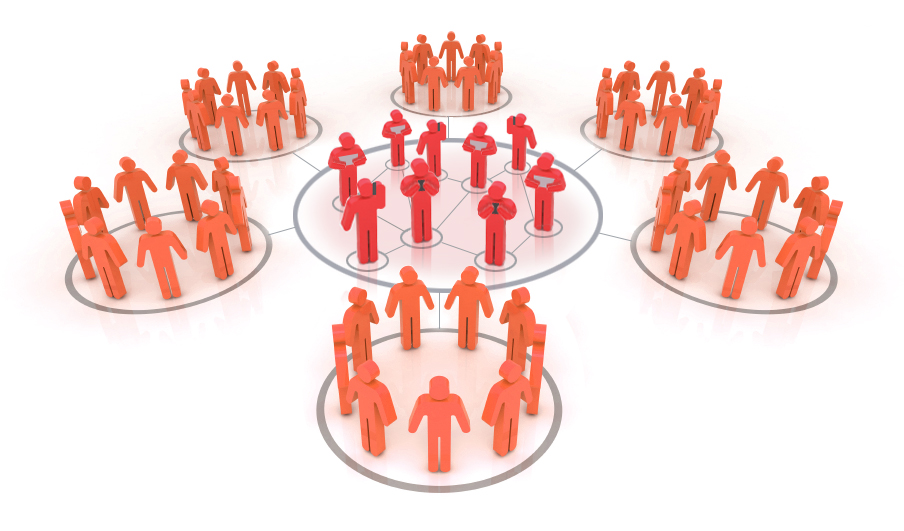

In [ ]:
from IPython.display import Image
#Image("Community.jpeg") #https://healthcommcapacity.org/

# Libraries needed:

**We need following libraries: networkx**


In [ ]:
# Import libraries
#!pip install networkx==2.8 please install this version
# !pip install scipy==1.8.0 please install this version
import pandas as pd #For reading dataset files
import networkx as nx #For network creation/analysis
from networkx.algorithms import community
import community as community_louvain
import matplotlib.pyplot as plt #For plotting graphs
#Libraries needed for igraph plot fuction to work properly in colab (Thanks to Joonas Ariva)
!pip install python-igraph==0.8.3
!apt install libcairo2-dev pkg-config python3-dev
!pip install python-igraph leidenalg cairocffi
import igraph as ig
%matplotlib inline

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
libcairo2-dev is already the newest version (1.15.10-2ubuntu0.1).
python3-dev is already the newest version (3.6.7-1~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
from networkx.algorithms import community
import community as community_louvain

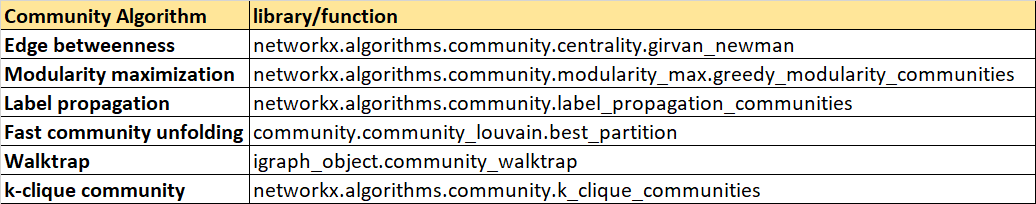

In [ ]:
from IPython.display import Image
#Image("CommunityFunc.png")

# Loading Datasets:

In [ ]:
G = nx.karate_club_graph()

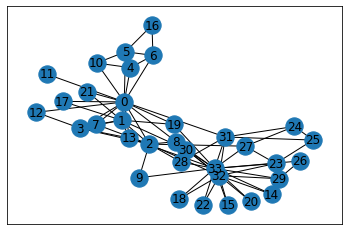

In [ ]:
nx.draw_networkx(G)

# Community Algorithms

## 1. Edge betweenness (Girvan–Newman)

In [ ]:
#Edge betweenness
lst_b = nx.algorithms.community.girvan_newman(G)
type(lst_b)

generator

In [ ]:
#Print possible communities
for x in lst_b:
  print(x)

({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})
({0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {9})
({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {32, 33, 2, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}, {4, 5, 6, 10, 16}, {9})
({0, 1, 3, 7, 11, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9})
({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30}, {9}, {11})
({0, 1, 3, 7, 12, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {9}, {11}, {26})
({0, 1, 3, 7, 13, 17, 19, 21}, {2, 24, 25, 27, 28, 31}, {4, 5, 6, 10, 16}, {32, 33, 8, 14, 15, 18, 20, 22, 23, 29, 30}, {9}, {11}, {12}, {26})
({0, 1, 3, 7, 13, 17, 19, 21}, {2, 24, 25

1


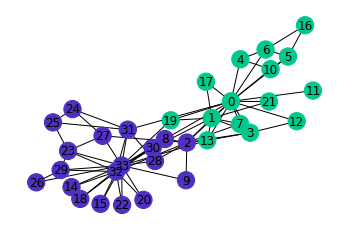

In [ ]:
#Community visualization
colors = ["#00C98D", "#5030C0", "#50F0F0"]
pos = nx.spring_layout(G)
lst_b = community.girvan_newman(G)
color_map_b = {}
keys = G.nodes()
values = "black"
for i in keys:
        color_map_b[i] = values
counter = 0
for x in lst_b:
  print(1)
  for c in x:
    for n in c:
      #print(n,counter)
      color_map_b[n] = colors[counter]
    counter = counter + 1
  break
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=dict(color_map_b).values())
nx.draw_networkx_labels(G, pos)
plt.axis("off")
plt.show()

In [ ]:
#Modularity for different communities
modularity = []
for x in lst_b:
  modularity.append(community.modularity(G, x))
modularity

[0.34878369493754113,
 0.3632478632478633,
 0.40129848783694944,
 0.3925049309664695,
 0.37623274161735704,
 0.3583168967784353,
 0.341715976331361,
 0.3247863247863249,
 0.3159105851413545,
 0.29865220249835644,
 0.28040762656147267,
 0.2628205128205128,
 0.2475345167652859,
 0.22682445759368827,
 0.20890861275476652,
 0.18984220907297825,
 0.18129520052596965,
 0.16009204470742933,
 0.14694280078895464,
 0.12031558185404344,
 0.10815253122945427,
 0.09064760026298486,
 0.08029257067718604,
 0.06993754109138725,
 0.05785667324128863,
 0.03418803418803419,
 0.022024983563445122,
 -0.002876397107166325,
 -0.026298487836949356,
 -0.03763971071663377,
 -0.05374753451676527,
 -0.04980276134122286]

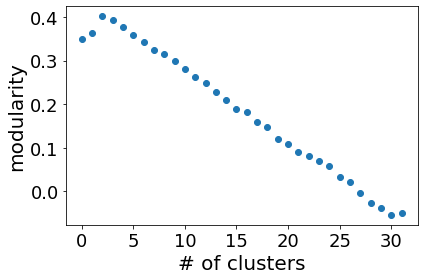

In [ ]:
#Plot modularity
plt.plot(modularity, 'o')
plt.xlabel('# of clusters',fontsize=20)
plt.ylabel('modularity',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig('moodularity.pdf')
plt.show()


In [ ]:
#Extract the community with maximum modularity
index = modularity.index(max(modularity))
i=0
lst_b = nx.algorithms.community.girvan_newman(G)
for v in lst_b:
  if i==index:
    temp = v
  i+=1

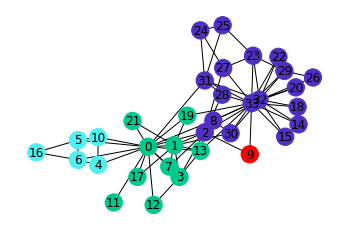

In [ ]:
#Community visualization (the community with maximum modularity)
colors = ["#00C98D", "#5030C0", "#50F0F0", 'red', 'blue']
pos = nx.spring_layout(G)
color_map_b = {}
keys = G.nodes()
values = "black"
for i in keys:
        color_map_b[i] = values
counter = 0
for x in temp:
  for n in x:
    color_map_b[n] = colors[counter]
  counter = counter + 1

nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=dict(color_map_b).values())
nx.draw_networkx_labels(G, pos)
plt.axis("off")
plt.show()

## 2. Modularity maximization

In [ ]:
community.greedy_modularity_communities(G)

[frozenset({8,
            14,
            15,
            18,
            20,
            22,
            23,
            24,
            25,
            26,
            27,
            28,
            29,
            30,
            31,
            32,
            33}),
 frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}),
 frozenset({0, 4, 5, 6, 10, 11, 16, 19})]

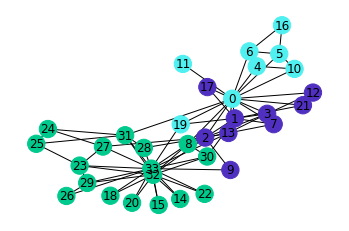

In [ ]:
#Community visualization
colors = ["#00C98D", "#5030C0", "#50F0F0"]
pos = nx.spring_layout(G)
lst_b = community.greedy_modularity_communities(G)
color_map_b = {}
keys = G.nodes()
values = "black"
for i in keys:
        color_map_b[i] = values
counter = 0
for x in lst_b:
  for n in x:
    color_map_b[n] = colors[counter]
  counter = counter + 1

nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=dict(color_map_b).values())
nx.draw_networkx_labels(G, pos)
plt.axis("off")
plt.show()

## 3. Label propagation

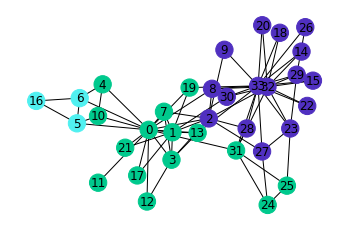

In [ ]:
colors = ["#00C98D", "#5030C0", "#50F0F0"]
pos = nx.spring_layout(G)
lst_m = community.label_propagation_communities(G)
color_map_b = {}
keys = G.nodes()
values = "black"
for i in keys:
        color_map_b[i] = values
counter = 0
for c in lst_m:
  for n in c:
    color_map_b[n] = colors[counter]
  counter = counter + 1
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=dict(color_map_b).values())
nx.draw_networkx_labels(G, pos)
plt.axis("off")
plt.show()

## 4. Fast community unfolding (Louvain)

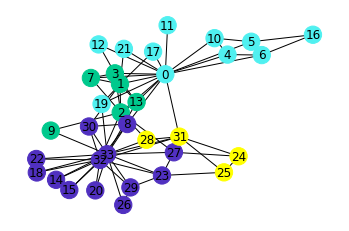

In [ ]:
import community.community_louvain as community_louvain
G = nx.karate_club_graph()
colors = ["#00C98D", "#5030C0", "#50F0F0", "yellow", "#00C98A", "#5030C0", "#50F0F0"]
pos = nx.spring_layout(G)
lst_m = community_louvain.best_partition(G)
color_map_b = {}
keys = G.nodes()
values = "black"
for i in keys:
        color_map_b[i] = values

for n in dict(lst_m):
  color_map_b[n] = colors[lst_m[n]]

nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=dict(color_map_b).values())
nx.draw_networkx_labels(G, pos)
plt.axis("off")
plt.show()

In [ ]:
community_louvain.best_partition(G)

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 3,
 5: 3,
 6: 3,
 7: 0,
 8: 1,
 9: 0,
 10: 3,
 11: 0,
 12: 0,
 13: 0,
 14: 1,
 15: 1,
 16: 3,
 17: 0,
 18: 1,
 19: 0,
 20: 1,
 21: 0,
 22: 1,
 23: 1,
 24: 2,
 25: 2,
 26: 1,
 27: 1,
 28: 2,
 29: 1,
 30: 1,
 31: 2,
 32: 1,
 33: 1}

## 5. Walktrap

In [ ]:
g = ig.Graph.TupleList(G.edges(), directed=False)

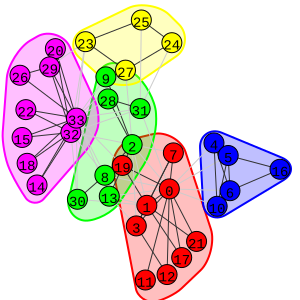

In [ ]:
wtrap = g.community_walktrap(steps = 4)
clust = wtrap.as_clustering()
ig.plot(clust, mark_groups = True, bbox=(300,300), vertex_label=g.vs['name'])
#Reference: https://towardsdatascience.com/detecting-communities-in-a-language-co-occurrence-network-f6d9dfc70bab

## 6. k-clique community

In [ ]:
from networkx.algorithms import community
def find_community(graph,k):
    return list(community.k_clique_communities(graph,k))

for k in range(2,10):
        print ("############# k-Clique: %d ################" % k)
        rst_com = find_community(G,k)
        print ("Count of Community being found：%d" % len(rst_com))
        print(rst_com)

############# k-Clique: 2 ################
Count of Community being found：1
[frozenset({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33})]
############# k-Clique: 3 ################
Count of Community being found：3
[frozenset({0, 1, 2, 3, 7, 8, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 26, 27, 28, 29, 30, 31, 32, 33}), frozenset({0, 4, 5, 6, 10, 16}), frozenset({24, 25, 31})]
############# k-Clique: 4 ################
Count of Community being found：3
[frozenset({0, 1, 2, 3, 7, 13}), frozenset({32, 33, 8, 30}), frozenset({32, 33, 29, 23})]
############# k-Clique: 5 ################
Count of Community being found：1
[frozenset({0, 1, 2, 3, 7, 13})]
############# k-Clique: 6 ################
Count of Community being found：0
[]
############# k-Clique: 7 ################
Count of Community being found：0
[]
############# k-Clique: 8 ################
Count of Community being found：0
[]
############# k-Clique: 9 ####

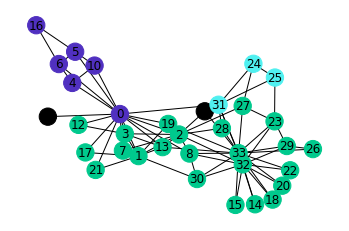

In [ ]:
colors = ["#00C98D", "#5030C0", "#50F0F0"]
pos = nx.spring_layout(G)
lst_m = community.k_clique_communities(G, 3)
color_map_b = {}
keys = G.nodes()
values = "black"
for i in keys:
        color_map_b[i] = values
counter = 0
for c in lst_m:
  for n in c:
    color_map_b[n] = colors[counter]
  counter = counter + 1
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_nodes(G, pos, node_color=dict(color_map_b).values())
nx.draw_networkx_labels(G, pos)
plt.axis("off")
plt.show()

## Exercise 1: Calculate and visualize community for graphs G_undirected and G_directed.
  1. Edge betweenness (Girvan–Newman)
  2. Modularity maximization
  3. Label propagation
  4. Fast community unfolding (Louvian)
  5. Walktrap
  6. k-clique community



In [ ]:
#Read nodes and edges datasets
nodes = pd.read_csv('InputFileNodes.csv')
edges = pd.read_csv('InputFileEdges.csv')
#Collapse all edges of the same type between the same two nodes by summing their weights
edges = edges.groupby(['from', 'to', 'type'])['weight'].sum().reset_index()

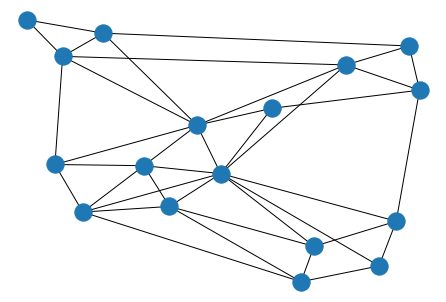

In [ ]:
#Create undirected graph using edgelist
G_undirected = nx.from_pandas_edgelist(edges, source='from', target='to',edge_attr=True)
nx.draw(G_undirected)

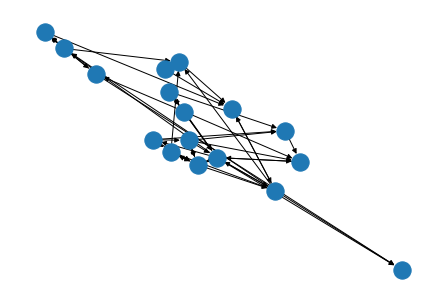

In [ ]:
#Create directed graph using edgelist
G_directed = nx.from_pandas_edgelist(edges, source='from', target='to',edge_attr=True, create_using=nx.DiGraph())
nx.draw(G_directed)

In [ ]:
#TODO